<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## PCA on speed dating data

Week 9 | 1.2

---

In this more detailed codealong/lab we are going to practice PCA. 

Considering how often people use PCA to simplify their data, reduce noise in their data, and find unmeasured "latent variables", it is important to spend the time to understand what's going on.


### Dataset

The dataset we are using for this lab is a subset of the [much more detailed speed dating dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment). In particular, this contains no information on the actual speed dating itself (successes with or opinions of other individuals). It also contains no "follow-up" information where individuals are re-asked the same questions about themselves. All it contains are things that an individual enjoys doing, their ratings of themselves on how desireable they are, and how they think others rate them on desireability.

Specifically, the columns in the data are outlined below:

    subject_id                   :   unique individual identifier
    like_sports                  :   enjoyment of participating in sports
    like_tvsports                :   enjoyment of watching sports on tv
    like_exercise                :   enjoyment of exercise
    like_food                    :   enjoyment of food
    like_museums                 :   enjoyment of museums
    like_art                     :   enjoyment of art
    like_hiking                  :   enjoyment of hiking
    like_gaming                  :   enjoyment of pl aying games
    like_clubbing                :   enjoyment of going clubbing/partying
    like_reading                 :   enjoyment of reading
    like_tv                      :   enjoyment of tv in general
    like_theater                 :   enjoyment of the theater (plays, musicals, etc.)
    like_movies                  :   enjoyment of movies
    like_concerts                :   enjoyment of concerts
    like_music                   :   enjoyment of music
    like_shopping                :   enjoyment of shopping
    like_yoga                    :   enjoyment of yoga
    subjective_attractiveness    :   how attractive they rate themselves
    subjective_sincerity         :   how sincere they rate themselves
    subjective_intelligence      :   how intelligent they rate themselves
    subjective_fun               :   how fun they rate themselves
    subjective_ambition          :   how ambitious they rate themselves
    objective_attractiveness     :   percieved rating others would give them on how attractive they are
    objective_sincerity          :   percieved rating others would give them on how sincere they are
    objective_intelligence       :   percieved rating others would give them on how intelligent they are
    objective_fun                :   percieved rating others would give them on how fun they are
    objective_ambition           :   percieved rating others would give them on how ambitious they are
    
There are 551 subjects total.

---

### Load packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.decomposition import PCA

---

### Load and clean speed dating data

In [3]:
sd = pd.read_csv('/Users/kiefer/github-repos/DSI-SF-4/datasets/speed_dating/speed_dating_user_attributes.csv')

In [4]:
sd.head(3)

,subject_id,wave,like_sports,like_tvsports,like_exercise,like_food,like_museums,like_art,like_hiking,like_gaming,...,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition,objective_attractiveness,objective_sincerity,objective_intelligence,objective_fun,objective_ambition
0,1,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
1,2,1,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,...,7.0,5.0,8.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN
2,3,1,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,...,8.0,9.0,9.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN


In [5]:
sd.isnull().sum()

subject_id                     0
wave                           0
like_sports                    7
like_tvsports                  7
like_exercise                  7
like_food                      7
like_museums                   7
like_art                       7
like_hiking                    7
like_gaming                    7
like_clubbing                  7
like_reading                   7
like_tv                        7
like_theater                   7
like_movies                    7
like_concerts                  7
like_music                     7
like_shopping                  7
like_yoga                      7
subjective_attractiveness      9
subjective_sincerity           9
subjective_intelligence        9
subjective_fun                 9
subjective_ambition            9
objective_attractiveness     237
objective_sincerity          237
objective_intelligence       237
objective_fun                237
objective_ambition           237
dtype: int64

---

### Subset the subjective columns and visualize the variables

In [6]:
sd.drop(['objective_attractiveness','objective_sincerity','objective_intelligence',
         'objective_fun','objective_ambition'], axis=1, inplace=True)

In [8]:
sd.dropna(inplace=True)
sd.shape

(542, 24)

In [9]:
subj_cols = [x for x in sd.columns if x.startswith('subjective')]
subj_cols

['subjective_attractiveness',
 'subjective_sincerity',
 'subjective_intelligence',
 'subjective_fun',
 'subjective_ambition']

In [14]:
subjective = sd[subj_cols]

In [15]:
from sklearn.preprocessing import StandardScaler

subjective = StandardScaler().fit_transform(subjective)

In [18]:
subjective = pd.DataFrame(subjective, columns=subj_cols)

In [19]:
subjective.head()

,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
0,-0.786472,-0.202716,-0.354194,0.193323,-0.323589
1,-0.066425,-2.329267,-0.354194,1.486916,-2.564932
2,0.653622,0.506135,0.564338,0.193323,0.236747
3,-0.066425,-0.202716,-1.272726,0.840119,0.236747
4,-0.786472,-3.746968,1.482870,-1.100270,0.236747


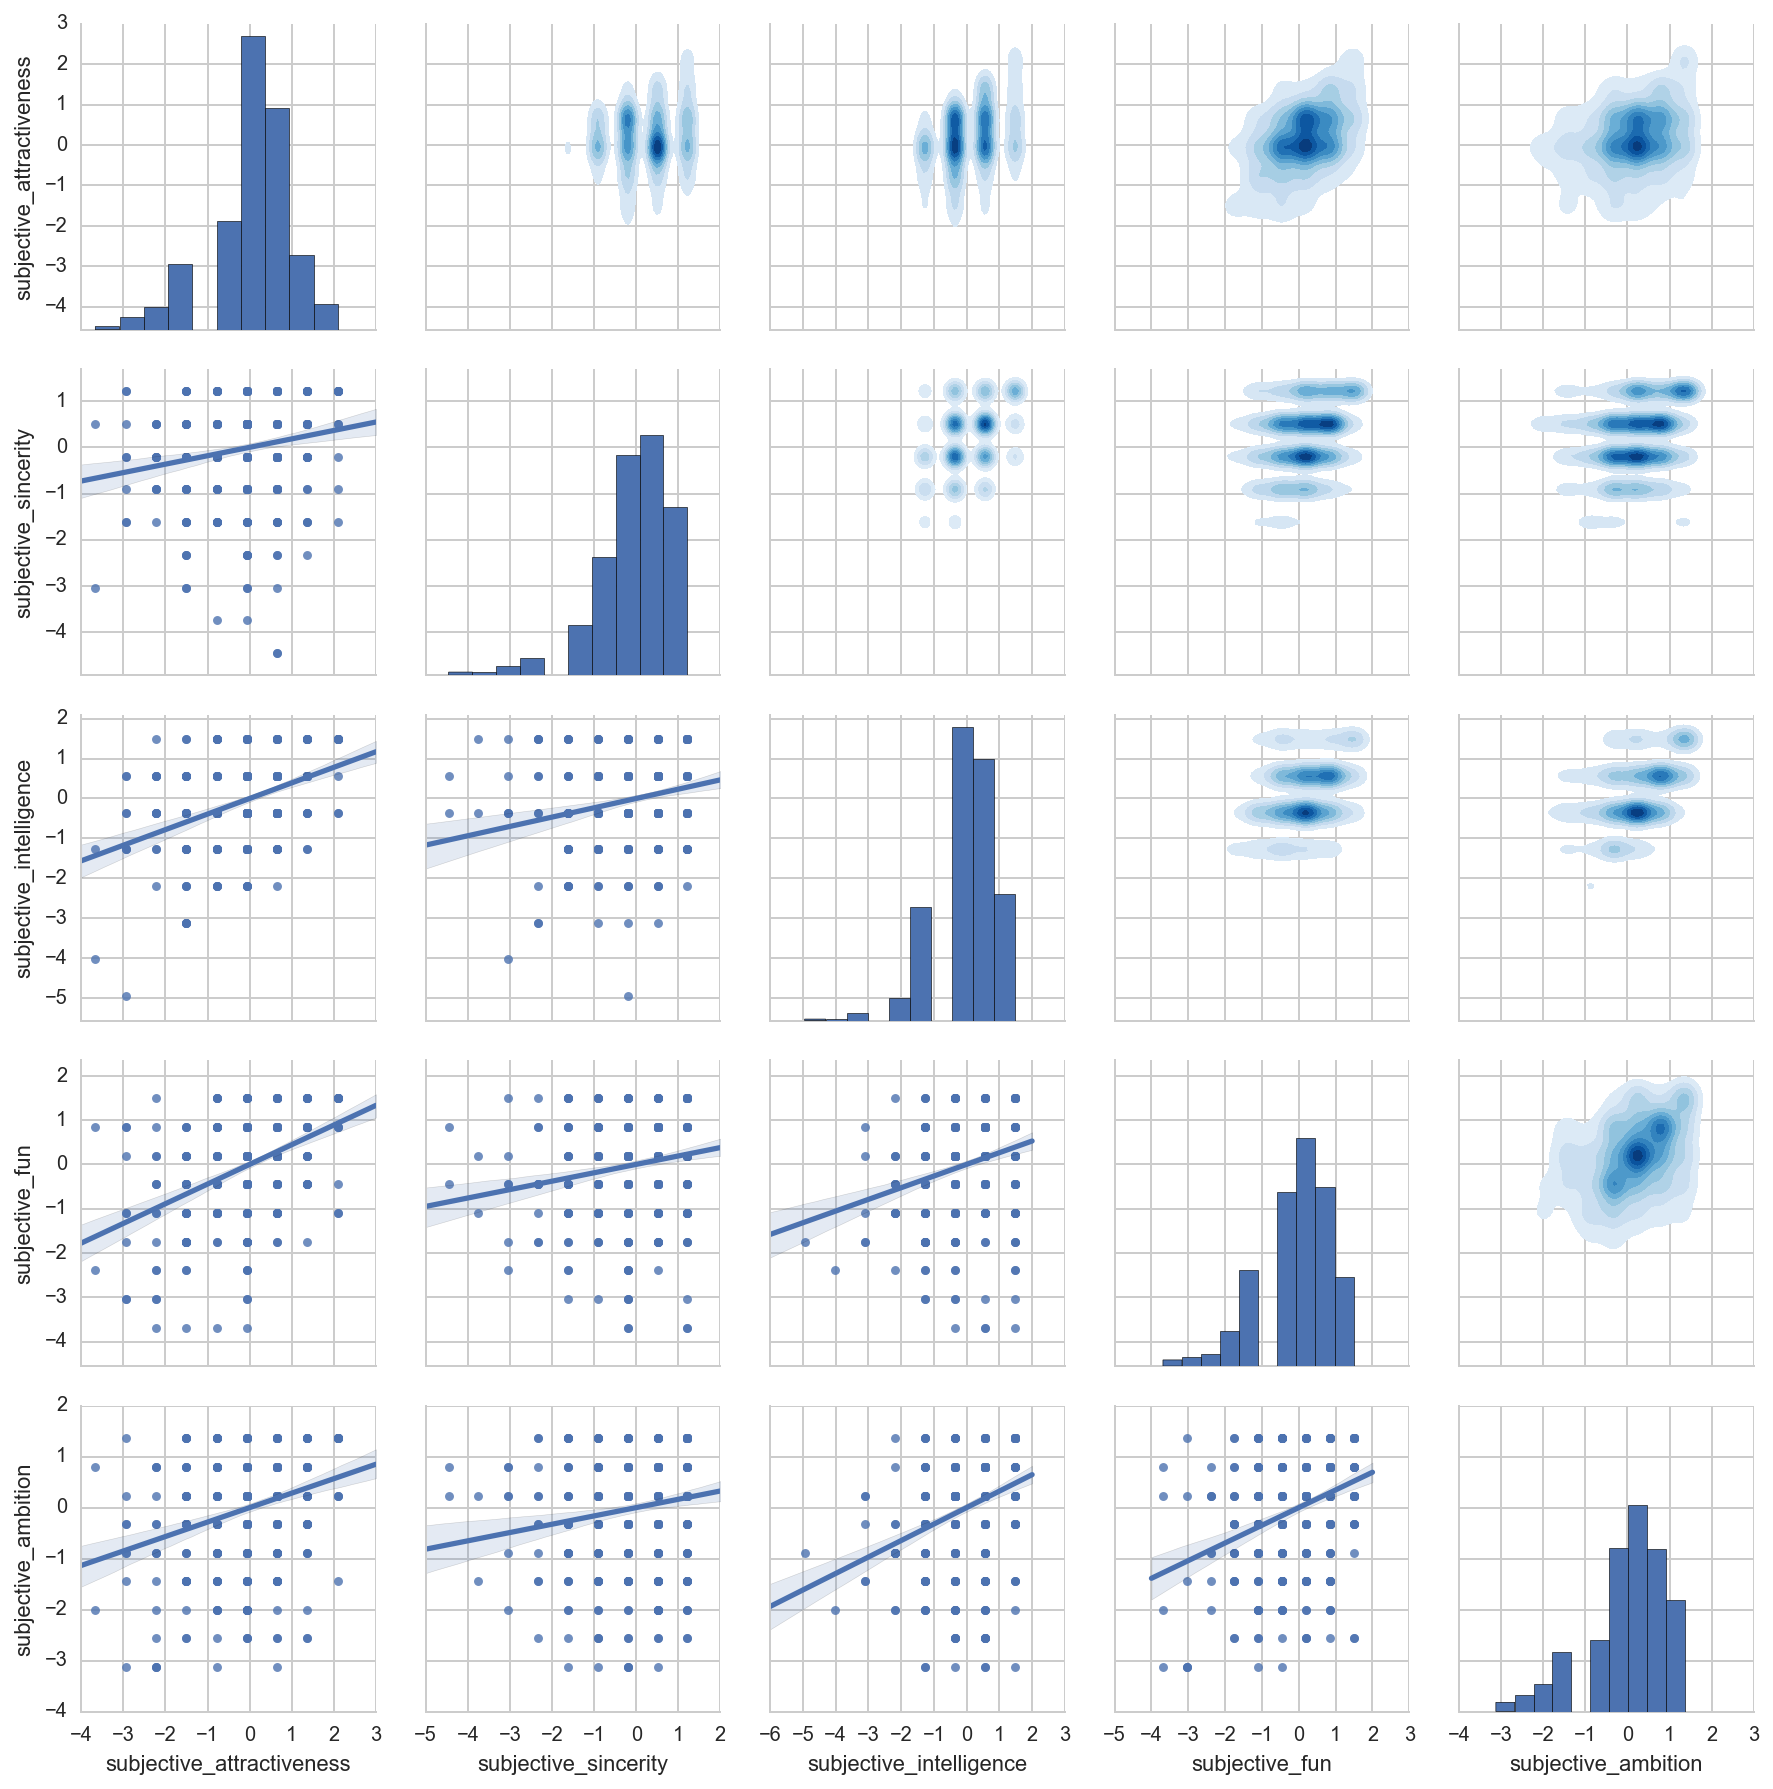

In [20]:
g = sns.PairGrid(subjective)
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap='Blues', shade=True, shade_lowest=False)
g = g.map_diag(plt.hist)

plt.show()

In [21]:
sd.columns

Index([u'subject_id', u'wave', u'like_sports', u'like_tvsports',
       u'like_exercise', u'like_food', u'like_museums', u'like_art',
       u'like_hiking', u'like_gaming', u'like_clubbing', u'like_reading',
       u'like_tv', u'like_theater', u'like_movies', u'like_concerts',
       u'like_music', u'like_shopping', u'like_yoga',
       u'subjective_attractiveness', u'subjective_sincerity',
       u'subjective_intelligence', u'subjective_fun', u'subjective_ambition'],
      dtype='object')

---

### Subset and visualize some preference variables

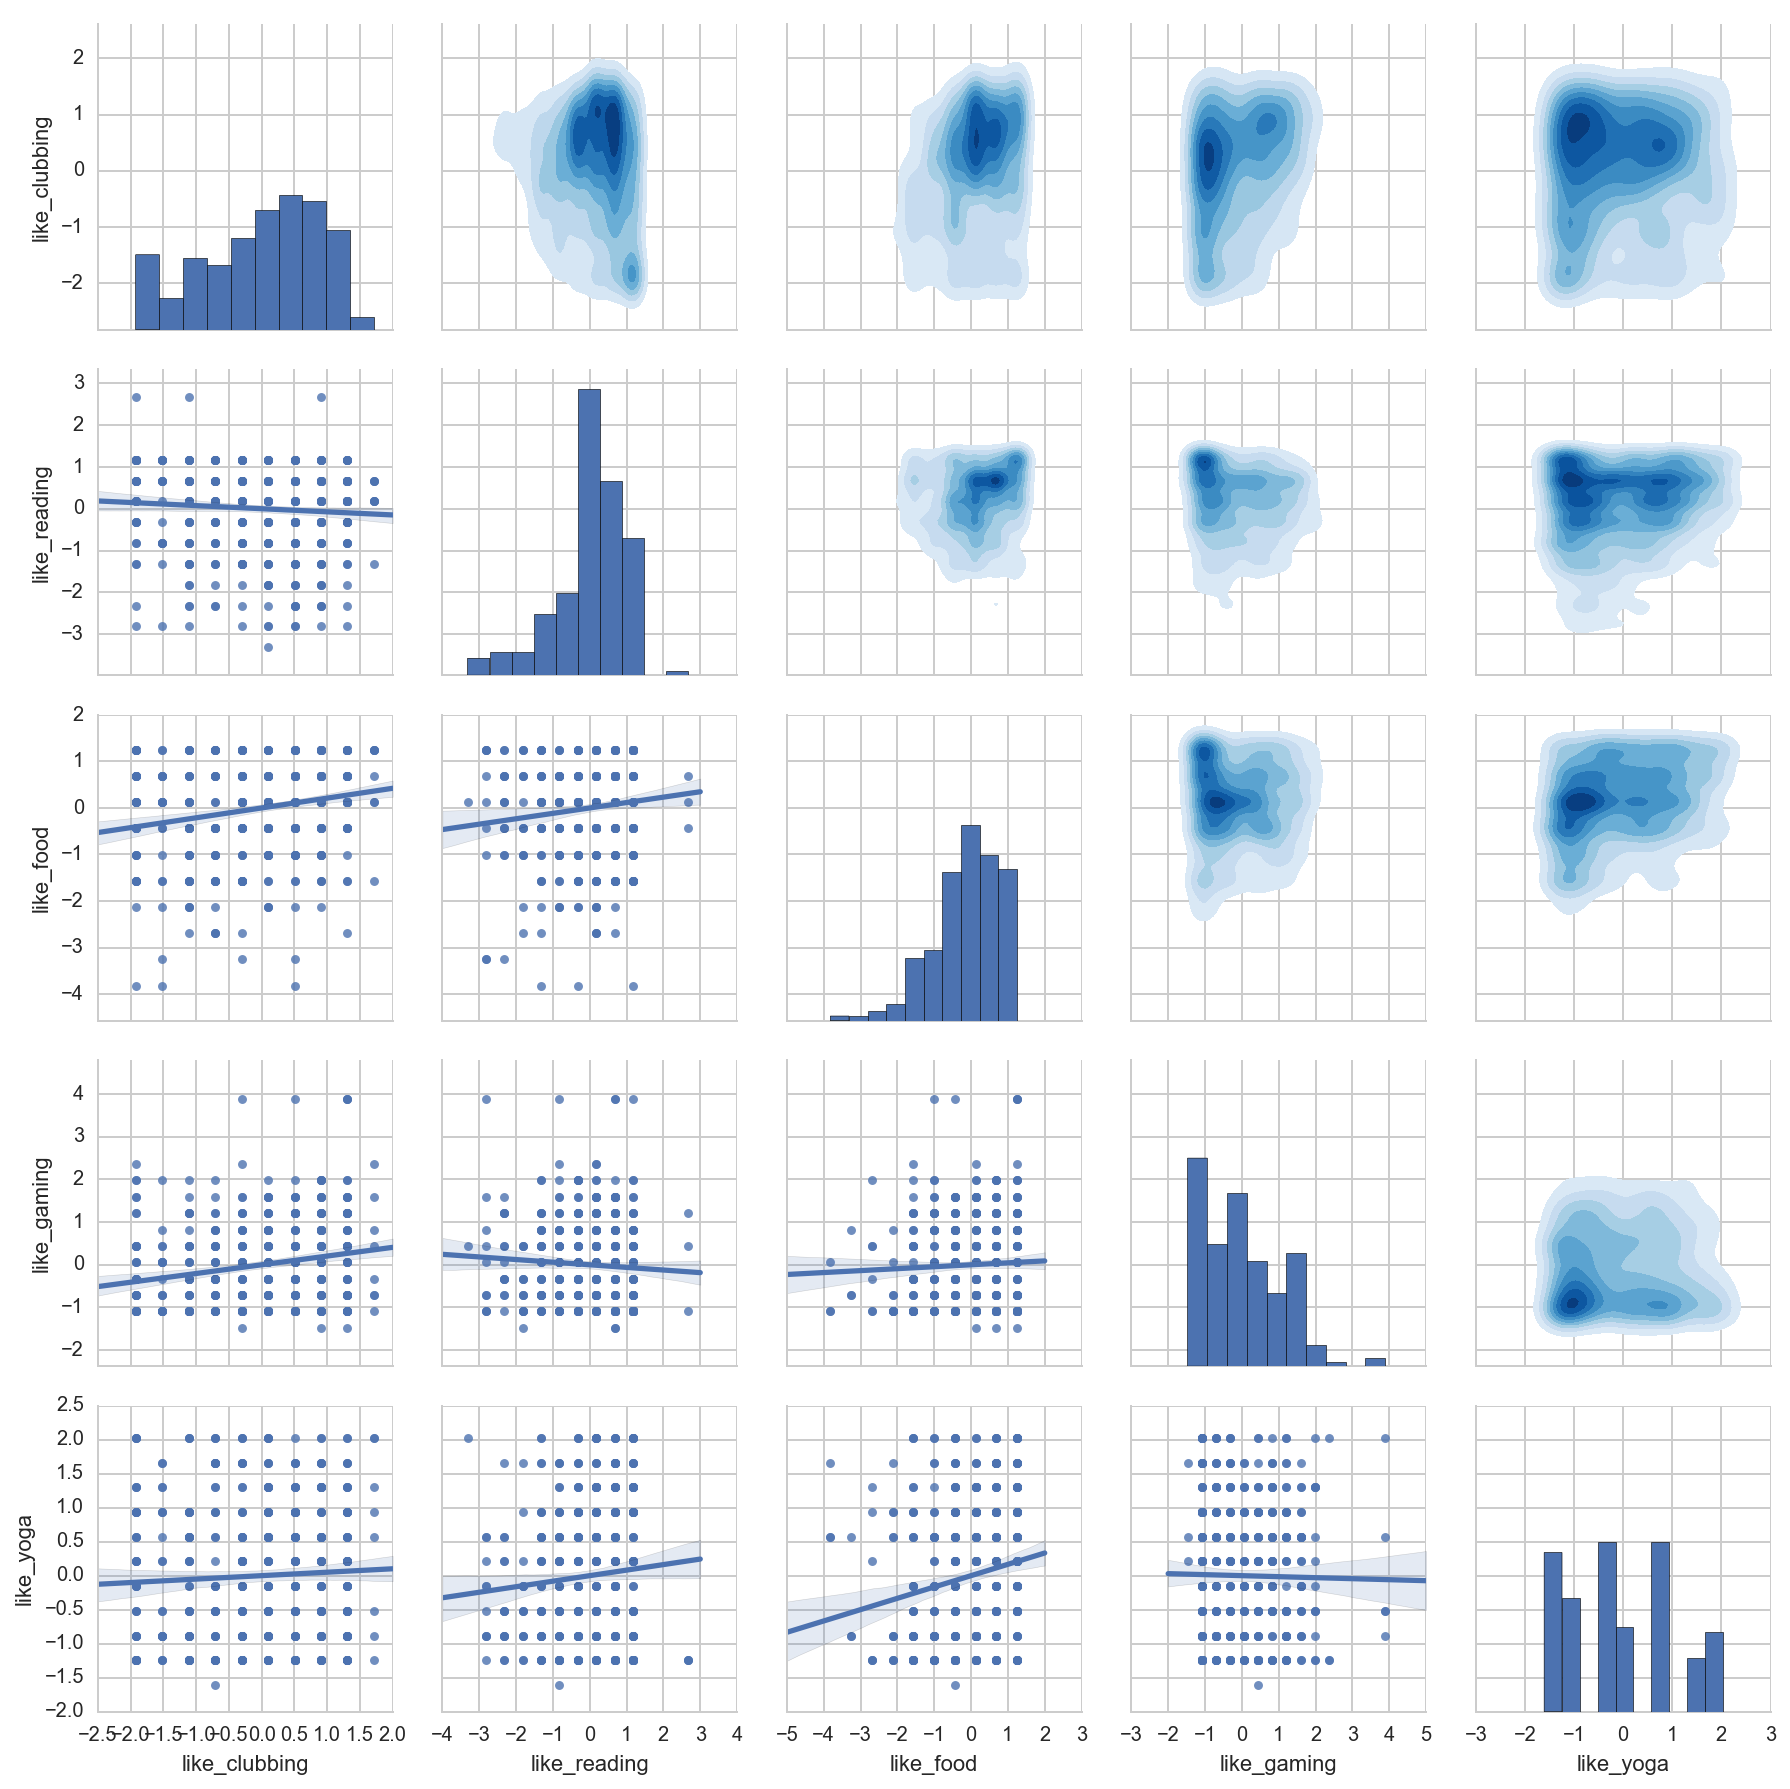

In [23]:
like_cols = ['like_clubbing','like_reading','like_food','like_gaming','like_yoga']
like = sd[like_cols]

like = StandardScaler().fit_transform(like)
like = pd.DataFrame(like, columns=like_cols)


g = sns.PairGrid(like)
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap='Blues', shade=True, shade_lowest=False)
g = g.map_diag(plt.hist)

plt.show()

---

### Fit PCA on the subjective ratings.


In [24]:
subj_pca = PCA()
subj_pca.fit(subjective.values)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

---

### Look at principal component weighting vectors (eigenvectors)

The eigenvectors which are the transformation weights

In [26]:
subj_components = subj_pca.components_


In [29]:
for i, vec in enumerate(['PC1','PC2','PC3','PC4','PC5']):
    print vec
    for j, col in enumerate(subj_cols):
        print col, subj_components[i][j]
    print '------------------------------\n'

PC1
subjective_attractiveness -0.501893942093
subjective_sincerity -0.315289774407
subjective_intelligence -0.467071220519
subjective_fun -0.483864118824
subjective_ambition -0.443187114572
------------------------------

PC2
subjective_attractiveness 0.218259794312
subjective_sincerity -0.909059948454
subjective_intelligence -0.0976897726634
subjective_fun 0.27400971778
subjective_ambition 0.203342212006
------------------------------

PC3
subjective_attractiveness -0.402023506031
subjective_sincerity -0.144386149378
subjective_intelligence 0.422893417483
subjective_fun -0.48141404023
subjective_ambition 0.63791176489
------------------------------

PC4
subjective_attractiveness 0.348118739157
subjective_sincerity -0.213776380599
subjective_intelligence 0.648420032201
subjective_fun -0.361047374079
subjective_ambition -0.531327825411
------------------------------

PC5
subjective_attractiveness -0.646262777145
subjective_sincerity -0.0874909551784
subjective_intelligence 0.41594927884

---

### Look at the eigenvalues and explained variance ratio

The eigenvalues are ordered such that the first components have the largest eigenvalues. The values and their normalized equivalent in the explained variance ratio attribute tell you how much of the variance in the original data is encapsulated in the new component variables.

In [30]:
subj_eigvals = subj_pca.explained_variance_
subj_pct_explained = subj_pca.explained_variance_ratio_

print subj_eigvals
print subj_pct_explained

[ 2.15642881  0.88760955  0.73684686  0.72096547  0.4981493 ]
[ 0.43128576  0.17752191  0.14736937  0.14419309  0.09962986]


---

### Transform the subjective data into principal component space

The transform function in the PCA will create you new component variable matrix.

In [31]:
subj_pcas = subj_pca.transform(subjective)

---

### Compare a person's original subjective ratings to component variables

In [41]:
person1_orig = subjective.iloc[0,:]
for i, col in enumerate(subj_cols):
    print col, person1_orig[i]

subjective_attractiveness -0.786472282796
subjective_sincerity -0.202715549943
subjective_intelligence -0.354194046745
subjective_fun 0.193322928375
subjective_ambition -0.323588760681


In [42]:
person1_pcs = subj_pcas[0, :]
for i, pc in enumerate(['PC'+str(i+1) for i in range(5)]):
    print pc, person1_pcs[i]

PC1 0.67394200085
PC2 0.0343995512789
PC3 -0.103826118121
PC4 -0.357983481206
PC5 0.576936672399


---

### Create PC1 manually

To demonstrate how the the new principal component matrix is created from the original variable columns and the eigenvector weighting matrix, we'll create the first component PC1 manually.

#### 1. Pull out the eigenvector for PC1

In [36]:
confidence_vec = subj_components[0]
confidence_vec

array([-0.50189394, -0.31528977, -0.46707122, -0.48386412, -0.44318711])

#### 2. Create a dataframe showing the original values for the subjective variables for person 1

In [37]:
making_pc1 = pd.DataFrame({'p1_original':subjective.iloc[0,:]},
                          index=subjective.columns)
making_pc1

,p1_original
subjective_attractiveness,-0.786472
subjective_sincerity,-0.202716
subjective_intelligence,-0.354194
subjective_fun,0.193323
subjective_ambition,-0.323589


#### 3. Add the eigenvector for PC1: the weights to multiply each original variable by

Recall that each component is a linear combination of the original variables multiplied by a "weight" defined in the eigenvector of that component.

In [38]:
making_pc1['pc1_weights'] = confidence_vec
making_pc1

,p1_original,pc1_weights
subjective_attractiveness,-0.786472,-0.501894
subjective_sincerity,-0.202716,-0.315290
subjective_intelligence,-0.354194,-0.467071
subjective_fun,0.193323,-0.483864
subjective_ambition,-0.323589,-0.443187


#### 4. Multiply the original variable values by the eigenvector values

These are the "pieces" of principal component 1 that will be added together to make the new value for that person.

In [39]:
making_pc1['weighted_orig'] = making_pc1['p1_original'] * making_pc1['pc1_weights']
making_pc1

,p1_original,pc1_weights,weighted_orig
subjective_attractiveness,-0.786472,-0.501894,0.394726
subjective_sincerity,-0.202716,-0.315290,0.063914
subjective_intelligence,-0.354194,-0.467071,0.165434
subjective_fun,0.193323,-0.483864,-0.093542
subjective_ambition,-0.323589,-0.443187,0.143410


#### 5. Sum the original values multiplied by the eigenvector weights to get person 1's value for PC1

In [40]:
making_pc1['weighted_orig'].sum()

0.6739420008503668

---

### Fit PCA on the preference data

In [48]:
like_cols = ['like_museums','like_art','like_theater','like_shopping','like_tvsports']
like = sd[like_cols]

like = StandardScaler().fit_transform(like)
like = pd.DataFrame(like, columns=like_cols)

In [49]:
like.head()

,like_museums,like_art,like_theater,like_shopping,like_tvsports
0,-2.935051,-2.526692,-2.560869,0.913254,-0.912780
1,0.497620,-0.311443,0.985579,-1.000836,-0.912780
2,-0.973525,-0.754493,0.098967,0.913254,1.230441
3,-0.483143,0.131607,0.985579,-1.766472,-1.269983
4,-0.483143,0.574657,-0.344339,0.913254,-0.198373


In [50]:
like_pca = PCA()
like_pca.fit(like)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [51]:
for i, vec in enumerate(['PC1','PC2','PC3','PC4','PC5']):
    print vec
    for j, col in enumerate(like_cols):
        print col, like_pca.components_[i][j]
    print '------------------------------\n'

PC1
like_museums -0.581579694549
like_art -0.576582744118
like_theater -0.495854888557
like_shopping -0.272577600291
like_tvsports 0.0956387964537
------------------------------

PC2
like_museums -0.0424452009165
like_art -0.0731626488728
like_theater 0.0378199272452
like_shopping 0.482184633091
like_tvsports 0.871156280149
------------------------------

PC3
like_museums -0.270115800209
like_art -0.267423415207
like_theater 0.103680392626
like_shopping 0.786566231354
like_tvsports -0.475485132633
------------------------------

PC4
like_museums 0.27411633693
like_art 0.322564077231
like_theater -0.860773453159
like_shopping 0.272970051938
like_tvsports -0.0732738902345
------------------------------

PC5
like_museums -0.71544472331
like_art 0.697593505613
like_theater 0.031890768562
like_shopping 0.000588106394798
like_tvsports 0.0220177615724
------------------------------



In [52]:
like_pca.explained_variance_ratio_

array([ 0.48815093,  0.20473971,  0.17505982,  0.10496944,  0.0270801 ])

In [47]:
sd.columns

Index([u'subject_id', u'wave', u'like_sports', u'like_tvsports',
       u'like_exercise', u'like_food', u'like_museums', u'like_art',
       u'like_hiking', u'like_gaming', u'like_clubbing', u'like_reading',
       u'like_tv', u'like_theater', u'like_movies', u'like_concerts',
       u'like_music', u'like_shopping', u'like_yoga',
       u'subjective_attractiveness', u'subjective_sincerity',
       u'subjective_intelligence', u'subjective_fun', u'subjective_ambition'],
      dtype='object')

---

### Predict "like_reading" from original and from PCA

#### Linear regression cross-validated on original variables:

#### Linear regression on first principal component

#### Linear regression on first 3 principal components